- **GBDT**
    - Impact of outliers
    - Feature importance

- **XGBoost**
    - Hyperparams
    - Code walkthrough

- **LightGBM**
    - GOSS (Gradient based one side sampling)
    - Exclusive Feature Bundling
    - Code walkthrough

- **Cascading**

- **Stacking**

- **Comparison**
    - RF vs GBDT
    - Cascading vs Stacking

In [ ]:
import pickle

!gdown 171Yoe_GSapyrmOnD9oBzHWNOD_OnQs0F
!gdown 1hnIlTPW3AMeB69EbeaXCRIrpMVT1Vwmc
!gdown 1nZtB_RtxMg_MgoRczb8UWQX-AEK_l3qE
!gdown 1zLDUErwKdmF-RacOyHEuI_z_46LssQtP


with open('X_train.pickle', 'rb') as handle:
    X_train = pickle.load(handle)

with open('X_test.pickle', 'rb') as handle:
    X_test = pickle.load(handle)

with open('Y_train.pickle', 'rb') as handle:
    Y_train = pickle.load(handle)

with open('Y_test.pickle', 'rb') as handle:
    Y_test = pickle.load(handle)

Downloading...
From: https://drive.google.com/uc?id=171Yoe_GSapyrmOnD9oBzHWNOD_OnQs0F
To: /content/Y_test.pickle
100% 31.7k/31.7k [00:00<00:00, 37.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1hnIlTPW3AMeB69EbeaXCRIrpMVT1Vwmc
To: /content/X_test.pickle
100% 253k/253k [00:00<00:00, 86.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1nZtB_RtxMg_MgoRczb8UWQX-AEK_l3qE
To: /content/Y_train.pickle
100% 126k/126k [00:00<00:00, 85.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1zLDUErwKdmF-RacOyHEuI_z_46LssQtP
To: /content/X_train.pickle
100% 1.01M/1.01M [00:00<00:00, 103MB/s]


In [ ]:
# from sklearn.tree import DecisionTreeClassifier as DTC
# from sklearn import tree
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import RandomizedSearchCV
# import datetime as dt
# from sklearn.ensemble import GradientBoostingClassifier as GBC
# from sklearn.model_selection import StratifiedKFold
# from xgboost import XGBClassifier


# **Impact of outliers** 

#### Question: Will outliers impact GBDT?

Outliers can impact GBDT

- Each model is fit on the residual of the previous model
- Outliers will have higher residual values
- So, so gradient boosting will focus a large amount of its attention on reducing residual for these points.

#### Question: How to handle outliers?
1. Remove outliers
2. Specialized loss functions to handle outliers



Let us consider squared-loss which is $∑_{i=1}^n(y_i - ŷ_i)^2$

Here, if there is an outlier the error increases quadratically because of squaring
    






<img src='https://drive.google.com/uc?id=1eWKV9YbLFQYGQCuSR_FGHANPDw68L84D' >


##### What changes can we make in the loss function so that the model be robust to outliers?

* We can use **Root mean squared error**
* We can use absolute values of the error 





<img src='https://drive.google.com/uc?id=1QrUznldwhmGMthsMG-mmuz7L89zXS9FC' >

#### Question: abs function is not differentiable at 0; how to handle that?
   * As, already the error is 0, we simply use derivative of abs function @0 = 0 (computational hack)

Huber loss can also be used.
 * This function be quadratic in some areas and linear in some
   * As mentioned in the formuala, it uses the quadratic function in some range and liinear in the other range of values

<img src='https://drive.google.com/uc?id=1ryIZnNANcX_a2nQjeWvwibEaoQz1CMOn' >



<img src='https://drive.google.com/uc?id=1-fA_MyJbXQbwq1yBygn0109CljpZD0VZ' >





<img src='https://drive.google.com/uc?id=1menZJ9cL_62wkbz-zD8W4uFbFJY5GgRk' >


# **Feature Importance**

#### How do we find feature importance in GBDT ? 

We simply find the feature importance of feature in each tree and 
- then take the average of these values to get over-all feature importance.



<img src='https://drive.google.com/uc?id=1NW-6jIIU55duZGJGzEIUk5P-8QZ3DZ-m' width = 600 >


#### Code walkthrough

In [ ]:
import datetime as dt
from matplotlib import pyplot as plt

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier as GBC

start = dt.datetime.now()
model3 = GBC(n_estimators=150, learning_rate=0.2, max_depth=4, random_state=0, verbose = 1).fit(X_train, Y_train)
end = dt.datetime.now()

print(f"Time taken for training : {end - start}\nTraining accuracy:{model3.score(X_train, Y_train)}\nTest Accuracy: {model3.score(X_test, Y_test)}")

      Iter       Train Loss   Remaining Time 
         1           0.9950            7.54m
         2           0.7782            6.24m
         3           0.6374            5.37m
         4           0.5332            4.93m
         5           0.4521            5.56m
         6           0.3916            5.57m
         7           0.3454            5.61m
         8           0.3093            5.74m
         9           0.2782            5.85m
        10           0.2546            5.58m
        20           0.1377            4.33m
        30           0.0919            3.67m
        40           0.0664            3.25m
        50           0.0502            2.89m
        60           0.0382            2.55m
        70           0.0305            2.25m
        80           0.0243            1.96m
        90           0.0194            1.65m
       100           0.0157            1.35m
Time taken for training : 0:03:48.389666
Training accuracy:1.0
Test Accuracy: 0.9617042860765914


[0.14900177 0.08996997 0.10690476 0.16619893 0.17604845 0.12061436
 0.0787365  0.11252526]


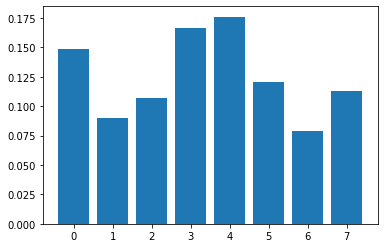

In [ ]:
print(model3.feature_importances_)

plt.bar(range(len(model3.feature_importances_)), model3.feature_importances_)
plt.show()

Notice,
- It took around 4 min to train a single model
- Imagine how much time it'll take if we do hyperparam tuning on it.

Sklearn's implemenation of GBDT is not optimized and hence not preferred.

**So, what library do we use then?**

# **Xgboost**

XGBoost is one the popular library known for its well optimized code

For example : 

- if you have numerical feature $f_i$, 
    - instead of tryinig all the values for thresholding, 
    - it build a histogram of data and use simple rules like quartiles and percentiles to make thresholding.

- It also does multi core optimization (parallelization)
    - it'll compute each branch of a base learner on different core to speed up the process.

### **Xgboost hyperparams**

1. **Eta**: or the learning rate is the shrinking/regularization term which we studier earlier 

2. **min_split_loss** specify the minimum Information Gain which you want for further split. 

#### Question: What happens if min_split_loss increases?
If the min_split_loss value of the model is increased, 
- the splitting stops if the min_split_loss is not met. 
    
Due to this the depth decreases resulting in shallow tress.

Hence,results in the underfitting of the model.


3. **max_depth**, this parameter is used to set the depth of the base learners  




4. **min_child_weight**: you can increase the weight of the child due to which the splitting stops if the required threshold is not met

5. **subsample**. it's nothing but the row sampling 
 * There are many ways of sampling, same with column sampling

6. **Lambda**, it is the used apply the L2 regularization on the weights, which is $γ$ in our case 

7. **Tree_methods**, there are many ways to build a tree, we can specify the method basing on the conditions 




<img src='https://drive.google.com/uc?id=1tvyj1KYedvVhaeIJIAh_ZillGmf5p5rE' >



<img src='https://drive.google.com/uc?id=1k_JD_dg0las0-N03UWQ_jSzkIP1M-b9W' >



<img src='https://drive.google.com/uc?id=1Vvz_rxFrx0EAgwClXn8OFwkhZ_5eD9C0' >

#### What are most used hyperparams?

- Number of estimators (M)
- Depth
- ν : learning rate
- Col sampling/ row sampling 




<img src='https://drive.google.com/uc?id=1n0JuWHd8NerqKnYnWFQqIwKeNuJG7PUr' >

### Code walkthrough

In [ ]:

from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold

import datetime as dt

params = {
        'learning_rate': [0.1, 0.5, 0.8],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
xgb = XGBClassifier(n_estimators=100, objective='multi:softmax', num_class=20, silent=True)




In [ ]:
folds = 3

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=10, scoring='accuracy', n_jobs=4, cv=skf.split(X_train,Y_train), verbose=3, random_state=1001 )


start = dt.datetime.now()
random_search.fit(X_train, Y_train)
end = dt.datetime.now()


In [ ]:
print('\n Best hyperparameters:')
print(random_search.best_params_)


 Best hyperparameters:
{'subsample': 0.8, 'max_depth': 5, 'learning_rate': 0.5, 'colsample_bytree': 1.0}


In [ ]:
best_xgb = XGBClassifier(n_estimators=100, objective='multi:softmax', num_class=20, subsample=0.8, max_depth=5, learning_rate=0.5, colsample_bytree=1.0, silent=True)
best_xgb.fit(X_train, Y_train)

XGBClassifier(colsample_bytree=1.0, learning_rate=0.5, max_depth=5,
              num_class=20, objective='multi:softprob', silent=True,
              subsample=0.8)

In [ ]:
print(f"Time taken for training : {end - start}\nTraining accuracy:{best_xgb.score(X_train, Y_train)}\nTest Accuracy: {best_xgb.score(X_test, Y_test)}")

Time taken for training : 0:04:44.867116
Training accuracy:1.0
Test Accuracy: 0.9786964240426071


Since we are using randomized Search
- we made total of 30 fits 
    - total 10 combination of hyperparam
    - 3 fold cv for each combination

All these 30 fits took mere 5 mins to run compared to 4 mins for single fit of sklearn GBDT.

**Do you now see how fast it is compared to sklearn implementation?**

#### Feature importance

[0.14220932 0.06247859 0.1474603  0.13250431 0.21800207 0.12647994
 0.07299956 0.09786595]


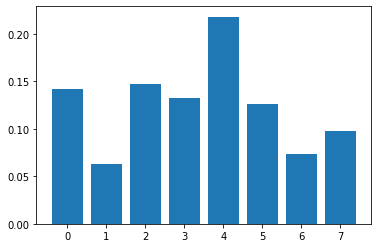

In [ ]:
print(best_xgb.feature_importances_)

plt.bar(range(len(best_xgb.feature_importances_)), best_xgb.feature_importances_)
plt.show()

# **LightGBM**

It was built at microsoft, primarily for a faster GBDT$.$

It is typically faster than Xgboost because of the code optimization


There are two main strategies for optimization:

#### 1.  GOSS - Gradient based one side sampling

When we are building the $m^{th}$ model the points we have is ($ x_i,res_{i,m} $),


so here instead of considering all points 

- we drop the points in which the $res_{i,m}$ is small 
- i.e. smart sampling ( probability of getting large residual value is higher)

So, when we are building $m^{th}$ model, we'll have fewer rows.

Here the key is to reduce the number of data points due to which the model becomes faster
  



 <img src='https://drive.google.com/uc?id=1NGKKYLSyz8MzFKQtzxnh9PTUbGQoM9JP' >

#### 2.  Exclusive Feature Bundling (EFB)

Let us assume we have a categorical feature with 3 categories 
- if we do **one hot encoding** (worst thing to do), 
    - for each row, only one of them will always be set i.e 1. 

<br>

#### What does Exclusive feature bundling do ? (intuition not detailed)

- It looks at all the dimensions 
- tries finding feature pairs s.t they are exclusive

<br>

#### What does exclusive mean? 
Say we have feature $f_1$, $f_2$.

When we say $f_1, f_2$ are exclusive, we mean
- if value of $f_1$ occurs, $f_2$ value doesn't
- or if $f_1$ is high, then $f_2$ is low

<br>

It tries to find these exclusive features (using graph based algo) and
- group these features 
   
So, here the key objective of EFB is to reduce the number of features and hence reduce dimensionality 

 <img src='https://drive.google.com/uc?id=1G2Ilv5_nhQ0rrX0KUp60v9UoqlDApWl4' >


### Code walkthrough

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
#Refer: https://lightgbm.readthedocs.io/en/latest/Parameters.html
import datetime as dt
gridParams = {
    'learning_rate': [0.1, 0.5, 0.8],
    'boosting_type' : ['gbdt'],
    'objective' : ['multiclass'],
    'max_depth' : [5,6,7,8],
    'colsample_bytree' : [0.5,0.7],
    'subsample' : [0.5,0.7],
    'metric':['multi_error'],
    'random_state' : [501]
    }

clf = lgb.LGBMClassifier(num_classes=20)
grid = RandomizedSearchCV(clf,gridParams,verbose=3,cv=3,n_jobs = -1,n_iter=10,)

start = dt.datetime.now()
grid.fit(X_train,Y_train)
end = dt.datetime.now()


Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [ ]:
grid.best_params_

{'subsample': 0.5,
 'random_state': 501,
 'objective': 'multiclass',
 'metric': 'multi_error',
 'max_depth': 7,
 'learning_rate': 0.5,
 'colsample_bytree': 0.7,
 'boosting_type': 'gbdt'}

In [ ]:
best_lgbm = lgb.LGBMClassifier(boosting_typ = 'gbdt',
                              objective = 'multiclass',
                              num_class=20, 
                              colsample_bytree=0.7, 
                              subsample=0.7, 
                              max_depth=8, 
                              learning_rate=0.5, 
                              random_state = 501)
best_lgbm.fit(X_train, Y_train)

LGBMClassifier(boosting_typ='gbdt', colsample_bytree=0.7, learning_rate=0.5,
               max_depth=8, num_class=20, objective='multiclass',
               random_state=501, subsample=0.7)

In [ ]:
print(f"Time taken for training : {end - start}\nTraining accuracy:{best_lgbm.score(X_train, Y_train)}\nTest Accuracy: {best_lgbm.score(X_test, Y_test)}")

Time taken for training : 0:01:06.067424
Training accuracy:1.0
Test Accuracy: 0.9857976160284048


Notice the time it took for 30 fits in XGBoost(5 mins) vs LightGBM (2 mins)

# **Cascading**

Lets, assume we are to detect a fraudulent transaction or not 
 
Let the dataset be $D_1$ which will be imbalanced, and 

- $y=1$ for fraudulent transaction
- $y =0$ for non fraudulent transaction

For a query point $x_q$, 
- we will pass this point through the first model $M_1$
- Model $M_1$ will return the probability of the query point being a fraud


Based on probability, we'll split it in 2 parts:
- if the probability of $y$ being 1 is extremely low, say $< 0.001$ then 
    - we consider that as not fraudulent, let this data be $D_1'$.

#### What happens to rest of the data? 

The rest of the points ($D_1-D_1'$) i.e. data with prob. > 0.001 which we are not sure about 
- will be passed through the next model $M_2$ 
- Model $M_2$ will be more stricter i.e. it'll penalize more.

Again model $M_2$ will split into 2 parts
- non fraud (say, $P(y =1 | x_q) < 0.001$)
- fraud transac. (p > 0.001)

We can again add another model after $M_2$ which will work on same principles





<img src='https://drive.google.com/uc?id=1TwfqSCDjjS3MsXaBadxNBIvBfF9LQ0JC' >

#### Did you notice the structure of model? 
We are cascading one model after another.

In the first model we are just removing all the genuine customers
- in second model, we are trying to find the may be fraudalent points from 2nd data set, 

we contimue doing this **cascading**

Every model is trained on different datasets ($D_n - D_n^1$ )

If even after all these models, we are not sure there will be a human at last to verify the same.

<img src='https://drive.google.com/uc?id=16cjT66tLCnFRuGzGPVmw4KUOgz0k85Ot' >



# **Stacking**

Lets assume we have a data set of $n$ poits.

#### What do we do in stacking?
We train $m$ **individual** models (base learners) on this data set, 
- these models can be different types of models like Decision tree,  GBDT, Random forest etc.

Do note that, these m model can be  optimial models.
- i.e. perfectly fitted model with minimum CV error.
 
Let these base learners be $c_1,c_2,....c_n$
* Now, given a datapoint, each of these model will give a prediction ($p_1,p_2,...p_n$) 

Unlike RF, we we train m model and aggregate the prediction using mean/median (regression) or majority vote (classification),

**In Stacking, We build a meta classifer on the predictios of the base learners**

#### What model will we use as Meta classifier? 
The Meta-classifier can be any model
* And this Meta-classifier gives the final output of the data 

#### What is happening in Stacking intuitively?
Here, we are taking the outputs of the perfectly build models and stacking them together to train a Meta-classifier to get the final output

BAM!!

 

<img src='https://drive.google.com/uc?id=14Ishp1beh9iHH1TrOICRomMKRMpgRrLQ' >

#### How is this implemented ? 

This is implemented using the **StackingClassifier** library from **miextend.classifier** module
* In the code we import all the libraries first
* Then **create the base classfiers** and pass these as **inputs to stacking classfier** and use **set any model as Meta-Classifier.**
* Now, **we train the model** and it's done

Double BAM!!



<img src='https://drive.google.com/uc?id=17wgLrV5LKmISQw7kzLrW2rzuDiolFDM5' >

#### Idea looks interesting, Why don't we use them ?
Ans: coz Deep learning came into existence.

## Comparison



### RF vs GBDT

We use GBDT more often than RF

#### Question: Why GBDT is used more often than RF?

1. Because we can choose any differentiable loss function but we cannot do this for random forest 
2. Though training time varies but it's only done once so it doesnt matter much, but Run-time is important as queries are given everytime
3. GBDT  has cheaper Run-time because 
    - the base learners are shallow and 
    - Random forest has deeper trees and 
    - the number of trees to train in GBDT are less when compared to Random Forest  







<img src='https://drive.google.com/uc?id=1kBqeWQ-y71bi6ndWQPUn58IGo4FmiTjT' >

# **Cascading vs Stacking**


**Cascading** is used when the risk or cost of mistakes is high, and the data is highly imbalanced.
 * Like fraud transaction detection in amazon

#### What about the explainability of the model?
We make sure thst every model is explainable, so that we can explain the output using these models 
  * We will see few algorithms, like **LIME and SHAP** which can explain any black box algorithm after few lectures in Deep Learning.



**Stacking** is mostly seen in kaggle competitions, not so much in real world.



<img src='https://drive.google.com/uc?id=1kzRryuOAFc5_HYtWcHxSGDwml-dHtGQk' >
